<a href="https://akademie.datamics.com/kursliste/">![title](bg_datamics_top.png)</a>

<center><em>© Datamics</em></center><br><center><em>Besuche uns für mehr Informationen auf <a href='https://akademie.datamics.com/kursliste/'>www.akademie.datamics.com</a></em>

# Eigene Startwerte mit dem Wasserscheidentransformationsalgorithmus

In vorherigen Lektionen hatten wir eine Menge Arbeit mit OpenCV zum Setzen von Markierungen als Startwerte (seeds) für den Wasserscheidentransformationsalgorithmus (watershed algorithm). Aber wie wäre es, wenn wir einfach Startwerte bereitstellen? Probieren wir es aus!

## Importe

In [1]:
import cv2
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

### Einlesen und Kopieren des Bildes

In [3]:
road = cv2.imread('../DATA/road_image.jpg')
road_copy = np.copy(road)

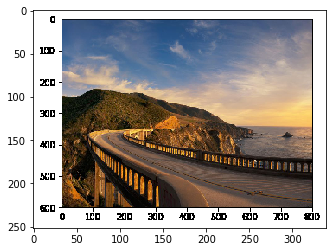

In [4]:
plt.imshow(road)

#### Erzeuge einen leeren Raum zum Zeichnen der Ergebnisse

In [5]:
road.shape

(252, 339, 3)

In [6]:
road.shape[:2]

(252, 339)

In [7]:
marker_image = np.zeros(road.shape[:2],dtype=np.int32)

In [8]:
segments = np.zeros(road.shape,dtype=np.uint8)

In [9]:
segments.shape

(252, 339, 3)

### Erzeuge Farben für die Markierungen

https://matplotlib.org/examples/color/colormaps_reference.html

In [10]:
from matplotlib import cm

Gibt (R,G,B,Alpha) zurück; wir benötigen lediglich RGB-Werte

In [11]:
cm.tab10(0)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)

In [12]:
cm.tab10(1)

(1.0, 0.4980392156862745, 0.054901960784313725, 1.0)

In [13]:
np.array(cm.tab10(0))

array([0.12156863, 0.46666667, 0.70588235, 1.        ])

In [14]:
np.array(cm.tab10(0))[:3]

array([0.12156863, 0.46666667, 0.70588235])

In [15]:
np.array(cm.tab10(0))[:3]*255

array([ 31., 119., 180.])

In [16]:
x = np.array(cm.tab10(0))[:3]*255

In [17]:
x.astype(int)

array([ 31, 119, 180])

In [18]:
tuple(x.astype(int))

(31, 119, 180)

Lass uns alle diese Schritte in einer Funktion zusammenfassen

In [19]:
def create_rgb(i):
    x = np.array(cm.tab10(i))[:3]*255
    return tuple(x)

In [20]:
colors = []

In [21]:
# Eine Farbe für jede Ziffer
for i in range(10):
    colors.append(create_rgb(i))

In [22]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

### Callback-Funktion (Rückruffunktion) einrichten

In [23]:
colors

[(31.0, 119.0, 180.0),
 (255.0, 127.0, 14.0),
 (44.0, 160.0, 44.0),
 (214.0, 39.0, 40.0),
 (148.0, 103.0, 189.0),
 (140.0, 86.0, 75.0),
 (227.0, 119.0, 194.0),
 (127.0, 127.0, 127.0),
 (188.0, 189.0, 34.0),
 (23.0, 190.0, 207.0)]

In [24]:
# Ziffern 0-9
n_markers = 10

In [25]:
# Standardeinstellung
current_marker = 1
marks_updated = False

In [26]:
def mouse_callback(event, x, y, flags, param):
    global marks_updated 

    if event == cv2.EVENT_LBUTTONDOWN:
        
        # ANZEIGE DER MARKIERUNGEN
        cv2.circle(marker_image, (x, y), 10, (current_marker), -1)
        
        # ANZEIGE AUF DEM BILD DES BENUTZERS
        cv2.circle(road_copy, (x, y), 10, colors[current_marker], -1)
        marks_updated = True


In [ ]:
cv2.namedWindow('Road Image')
cv2.setMouseCallback('Road Image', mouse_callback)

while True:
    
    # Zeige die 2 Fenster
    cv2.imshow('WaterShed Segments', segments)
    cv2.imshow('Road Image', road_copy)
        
        
    # Schliesse alles, wenn Esc gedrückt wird
    k = cv2.waitKey(1)

    if k == 27:
        break
        
    # Entferne alle Farben und starte von neuem, wenn 'c' gedrückt wird
    elif k == ord('c'):
        road_copy = road.copy()
        marker_image = np.zeros(road.shape[0:2], dtype=np.int32)
        segments = np.zeros(road.shape,dtype=np.uint8)
        
    # Wenn eine Ziffer 0-9 gewählt wird, indiziere die Farbe
    elif k > 0 and chr(k).isdigit():
        # chr konvertiert zu einer druckbaren Ziffer
        current_marker  = int(chr(k))
        
        # CODE ZUM ÜBERPRÜFEN OB DER BENUTZER UNAUFMERKSAM IST
#         n = int(chr(k))
#         if 1 <= n <= n_markers:
#             current_marker = n
    
    # Wenn wir irgendwo klicken, führe den Wasserscheidentransformationsalgorithmus auf unseren ausgewählten Markierungen aus
    if marks_updated:
        
        marker_image_copy = marker_image.copy()
        cv2.watershed(road, marker_image_copy)
        
        segments = np.zeros(road.shape,dtype=np.uint8)
        
        for color_ind in range(n_markers):
            segments[marker_image_copy == (color_ind)] = colors[color_ind]
        
        marks_updated = False
        
cv2.destroyAllWindows()